In [1]:
from datetime import datetime

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math

In [2]:
#figsize = (42, 20)
figsize = (20, 10)

In [3]:
df = pd.read_csv(r'BD Tratado\baseFim.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MATRÍCULA         99550 non-null  int64  
 1   DATA              99550 non-null  object 
 2   ATRASO            99550 non-null  float64
 3   Carga             99405 non-null  float64
 4   NOTURNO           49602 non-null  float64
 5   NÚM. VIAGENS DIA  74650 non-null  float64
 6   VALOR POR VIAGEM  74650 non-null  float64
 7   Tempo de casa     99550 non-null  float64
 8   SALÁRIO           99550 non-null  float64
 9   SO                89101 non-null  float64
 10  SX                89101 non-null  float64
 11  MANUAL            99550 non-null  float64
 12  dist              63301 non-null  float64
 13  HORÁRIO INÍCIO    99550 non-null  float64
 14  HORÁRIO FINAL     99550 non-null  float64
 15  agr_SINDICATO     99550 non-null  object 
dtypes: float64(13), int64(1), object(2)
memo

In [4]:
df = df.drop(['NOTURNO', 'NÚM. VIAGENS DIA', 'VALOR POR VIAGEM'],axis=1)
df = df.dropna()
df.shape

(56359, 13)

In [5]:
df['DATA'].head() 

37    2020-01-20 00:00:00
38    2020-01-21 00:00:00
39    2020-01-22 00:00:00
40    2020-01-23 00:00:00
41    2020-01-24 00:00:00
Name: DATA, dtype: object

C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


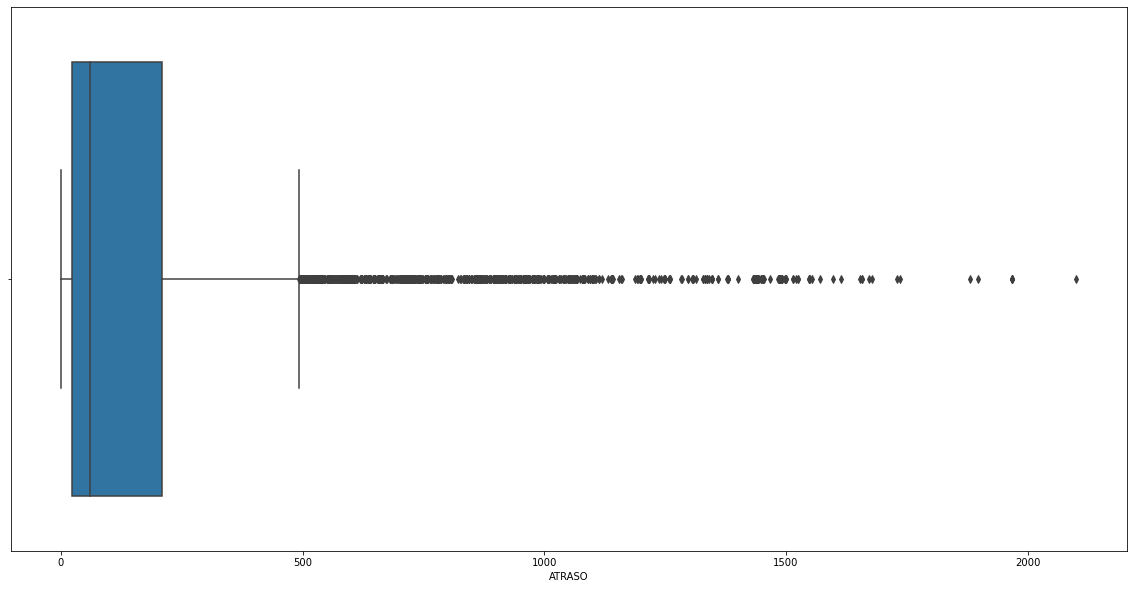

In [6]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(df['ATRASO'])

In [7]:
# Muito outlier na vairável resposta

def limpeza_outliers(df, value, interacoes=10):
    i = 1
    linhas_ini = df.shape[0]
    linhas_ant = 1
    linhas_dps = 0
    while (linhas_ant != linhas_dps) & (i <= interacoes):
        Q1 = df[value].quantile(0.25)
        Q3 = df[value].quantile(0.75)
        IQR = Q3 - Q1
        linhas_ant = df.shape[0]
        df = df[df[value] > (Q1 - 1.5*IQR)]
        df = df[df[value] < (Q3 + 1.5*IQR)]
        linhas_dps = df.shape[0]
        i = i + 1
    return df, linhas_ini, linhas_dps, i-1

In [8]:
df, antes, depois, contagem = limpeza_outliers(df, 'ATRASO')
print('linhas antes: ', antes)
print('linhas depois: ', depois)
print('quantas interações: ', contagem)

linhas antes:  56359
linhas depois:  38764
quantas interações:  8


C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


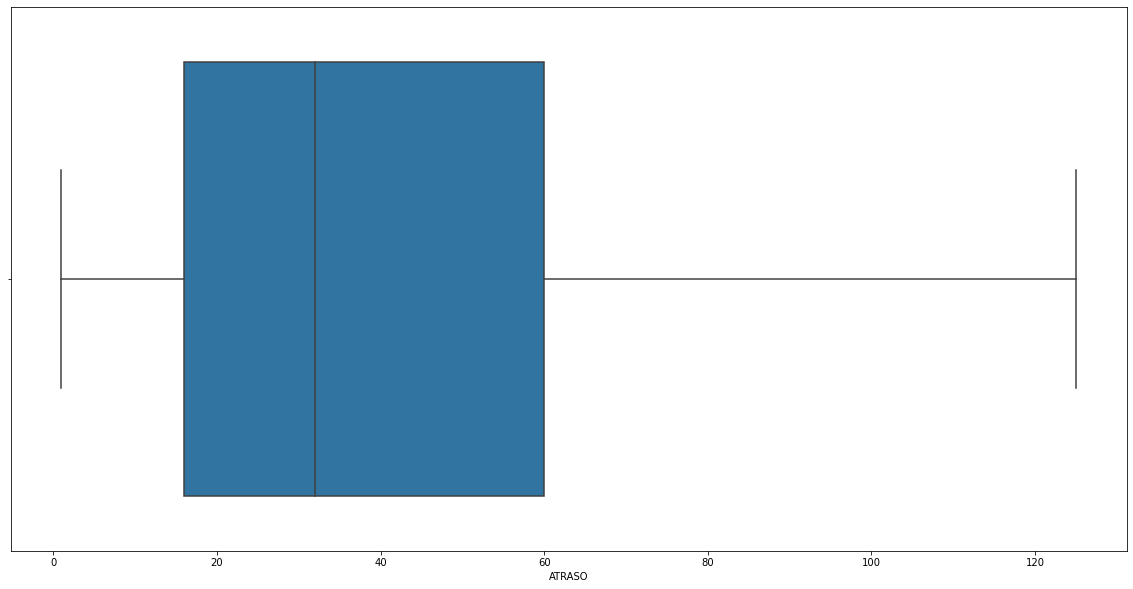

In [9]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(df['ATRASO'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38764 entries, 37 to 99532
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRÍCULA       38764 non-null  int64  
 1   DATA            38764 non-null  object 
 2   ATRASO          38764 non-null  float64
 3   Carga           38764 non-null  float64
 4   Tempo de casa   38764 non-null  float64
 5   SALÁRIO         38764 non-null  float64
 6   SO              38764 non-null  float64
 7   SX              38764 non-null  float64
 8   MANUAL          38764 non-null  float64
 9   dist            38764 non-null  float64
 10  HORÁRIO INÍCIO  38764 non-null  float64
 11  HORÁRIO FINAL   38764 non-null  float64
 12  agr_SINDICATO   38764 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 4.1+ MB


In [11]:
#Weekday	Output
#Sunday	    0
#Monday	    1
#Tuesday	2
#Wednesday	3
#Thursday	4
#Friday	    5
#Saturday	6

df['DiaSemana'] = df['DATA'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())
df = df.merge(pd.get_dummies(df['DiaSemana'],prefix='DiaSemana'),how='inner', left_index=True, right_index=True)
df[['DiaSemana', 'DiaSemana_0', 'DiaSemana_1', 'DiaSemana_2', 'DiaSemana_3', 'DiaSemana_4', 'DiaSemana_5', 'DiaSemana_6']].head()

,DiaSemana,DiaSemana_0,DiaSemana_1,DiaSemana_2,DiaSemana_3,DiaSemana_4,DiaSemana_5,DiaSemana_6
37,0,1,0,0,0,0,0,0
38,1,0,1,0,0,0,0,0
39,2,0,0,1,0,0,0,0
40,3,0,0,0,1,0,0,0
41,4,0,0,0,0,1,0,0


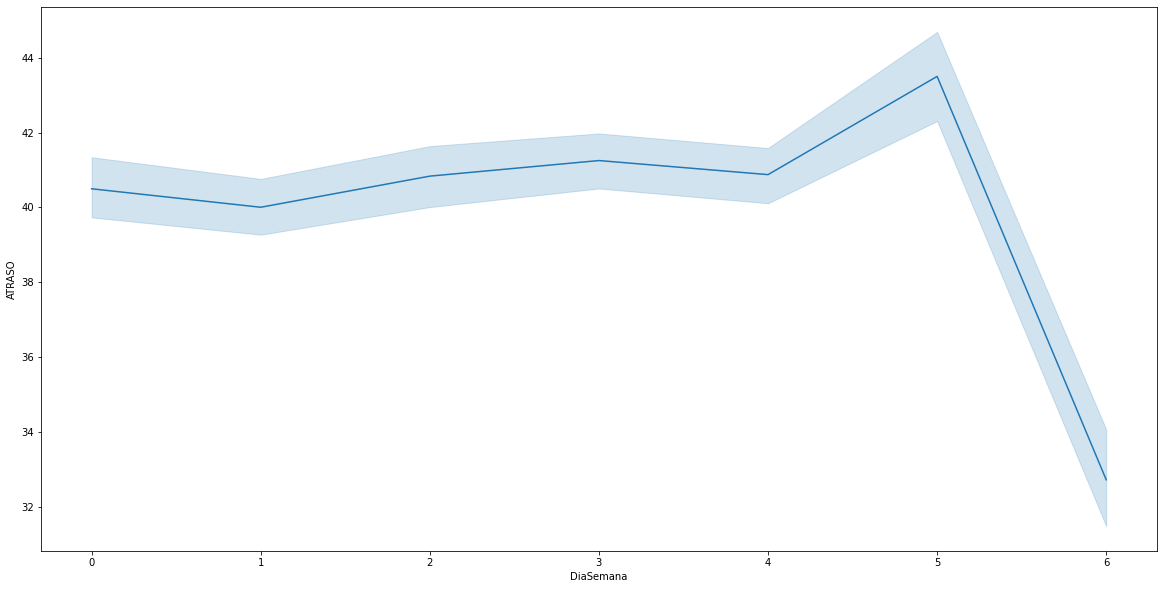

In [12]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['DiaSemana'], y = df['ATRASO'])

In [13]:
df['Mes'] = df['DATA'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
df = df.merge(pd.get_dummies(df['Mes'],prefix='Mes'),how='inner', left_index=True, right_index=True)
df[['Mes', 'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12']]

,Mes,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
37,1,1,0,0,0,0,0,0,0,0,0,0,0
38,1,1,0,0,0,0,0,0,0,0,0,0,0
39,1,1,0,0,0,0,0,0,0,0,0,0,0
40,1,1,0,0,0,0,0,0,0,0,0,0,0
41,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,1,1,0,0,0,0,0,0,0,0,0,0,0
99498,1,1,0,0,0,0,0,0,0,0,0,0,0
99504,1,1,0,0,0,0,0,0,0,0,0,0,0
99530,1,1,0,0,0,0,0,0,0,0,0,0,0


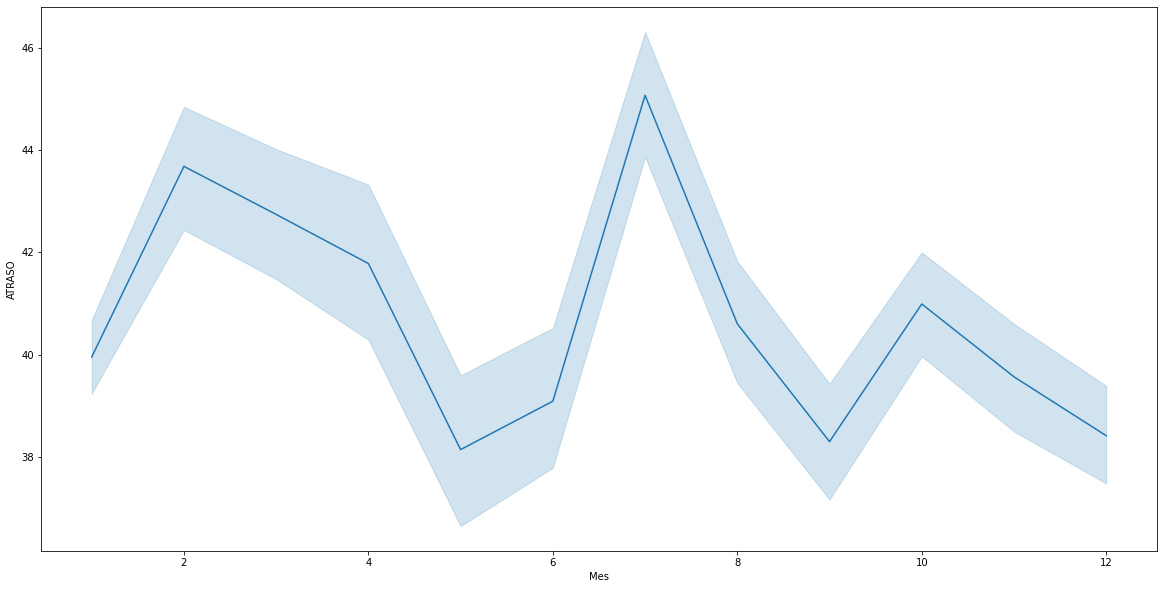

In [14]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['Mes'], y = df['ATRASO'])

In [15]:
df = df.drop(['DATA'],axis=1)
df.shape

(38764, 33)

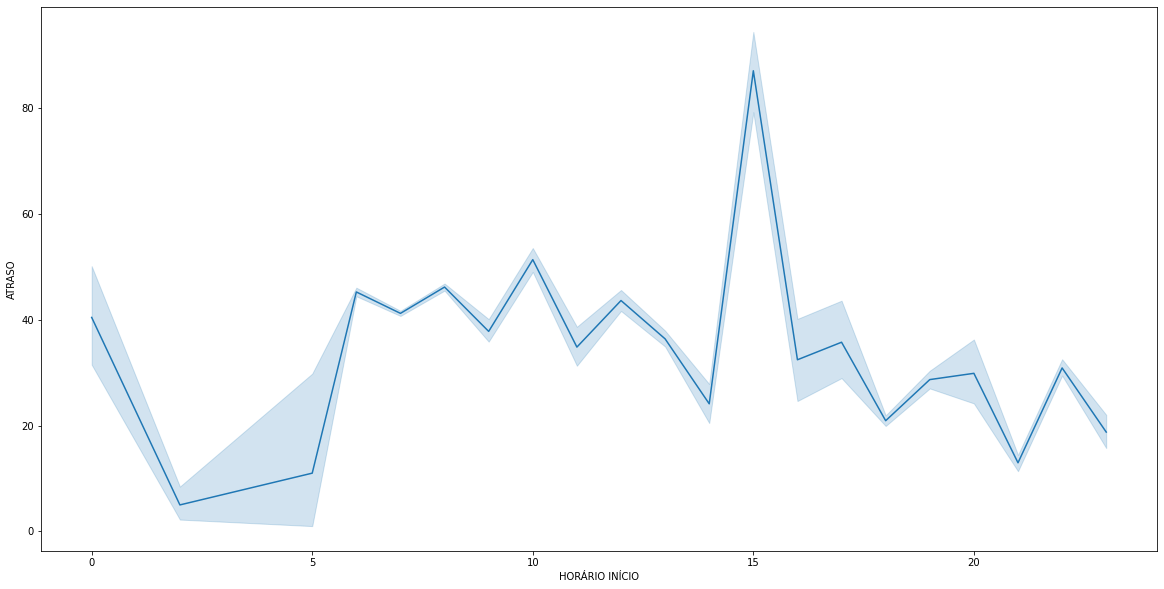

In [16]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['HORÁRIO INÍCIO'], y = df['ATRASO'])

In [17]:
df[['MATRÍCULA', 'HORÁRIO INÍCIO', 'ATRASO']].head()

,MATRÍCULA,HORÁRIO INÍCIO,ATRASO
37,3143,7.0,48.0
38,3143,7.0,48.0
39,3143,7.0,48.0
40,3143,7.0,48.0
41,3143,7.0,48.0


In [18]:
df[['MATRÍCULA', 'HORÁRIO INÍCIO','ATRASO']][df['HORÁRIO INÍCIO'] < 3].sort_values('ATRASO',ascending=False).drop_duplicates('MATRÍCULA')

,MATRÍCULA,HORÁRIO INÍCIO,ATRASO
43117,227262,0.0,120.0
95911,234538,0.0,104.0
48403,228468,0.0,104.0
41518,227183,0.0,88.0
41737,227211,0.0,59.0
85122,233129,0.0,49.0
41109,227160,0.0,48.0
92542,233948,0.0,46.0
43335,227292,0.0,22.0
44081,227494,2.0,21.0


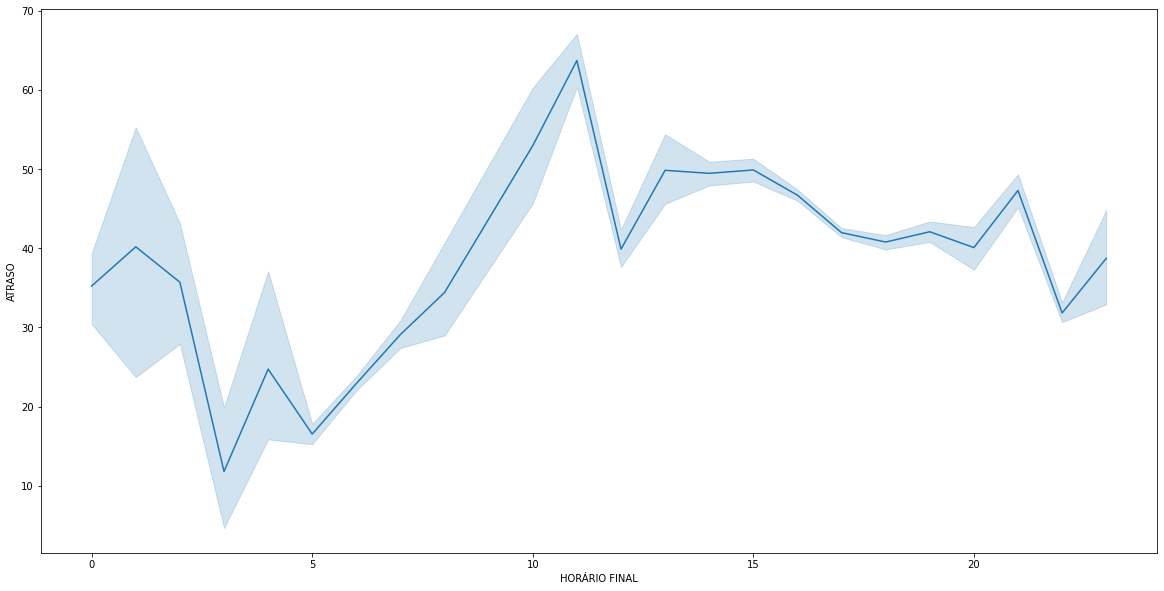

In [19]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['HORÁRIO FINAL'], y = df['ATRASO'])

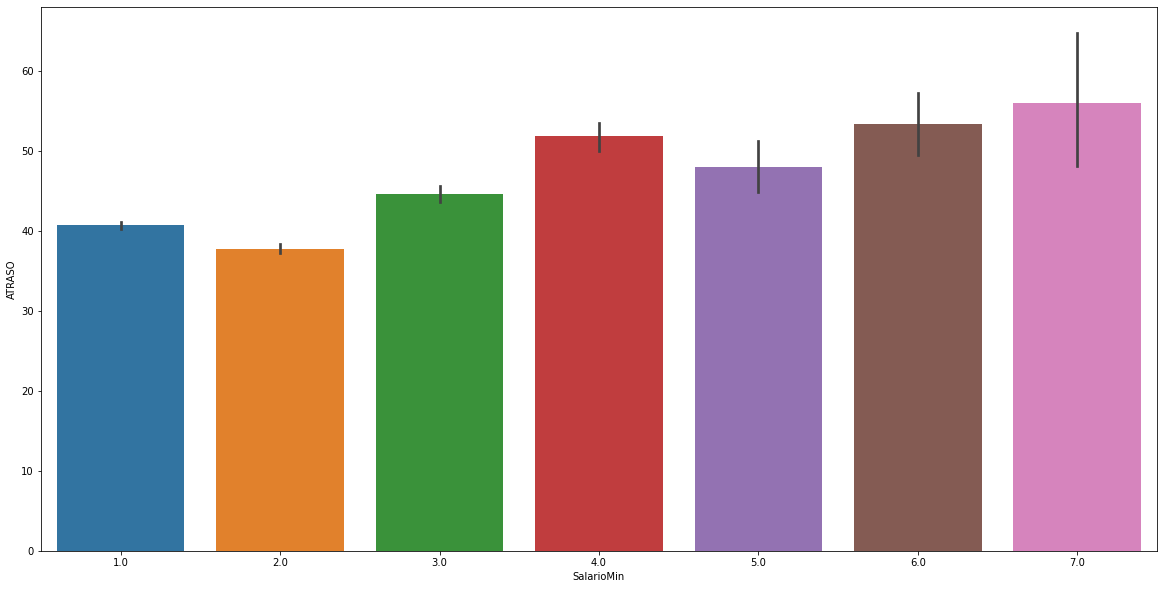

In [20]:
fig, ax = plt.subplots(figsize=figsize)
df['SalarioMin'] = round(df['SALÁRIO']/1100)
sns.barplot(x=df['SalarioMin'], y = df['ATRASO'])

C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


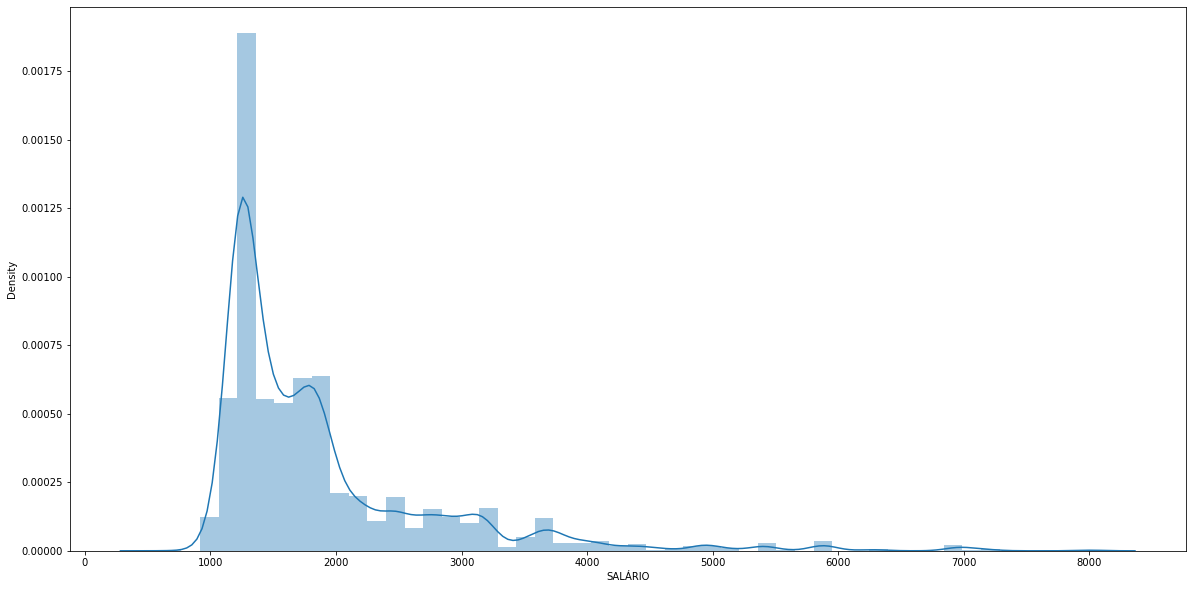

In [21]:
fig, ax = plt.subplots(figsize=figsize)
sns.distplot(df['SALÁRIO'])

C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


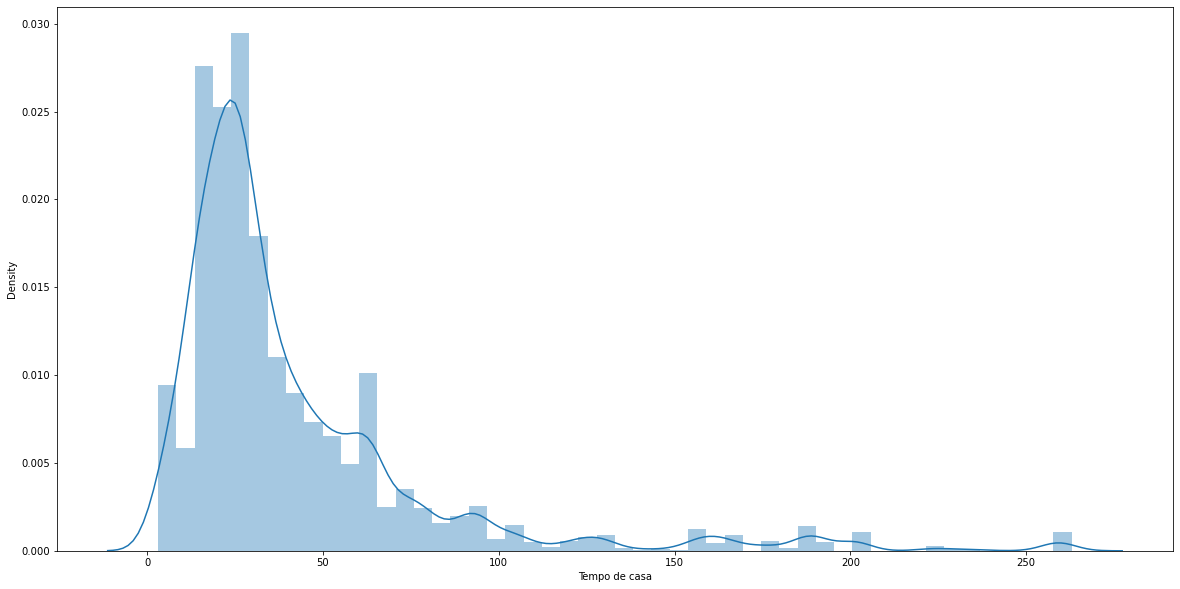

In [22]:
fig, ax = plt.subplots(figsize=figsize)
sns.distplot(df['Tempo de casa'])

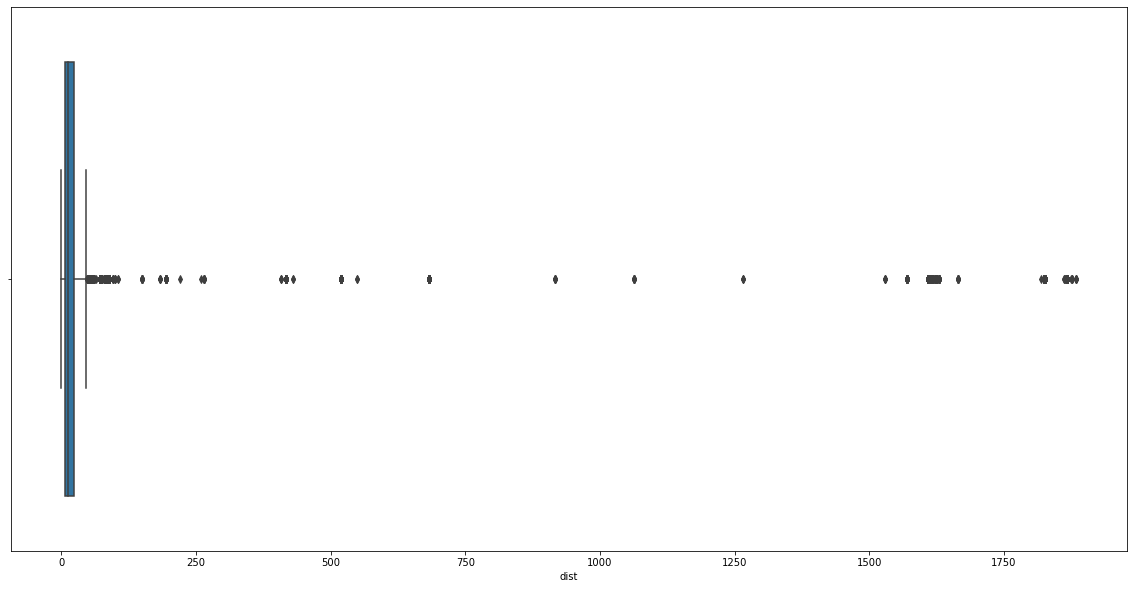

In [23]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x=df['dist'])

In [24]:
df, antes, depois, contagem = limpeza_outliers(df, 'dist')
print('linhas antes: ', antes)
print('linhas depois: ', depois)
print('quantas interações: ', contagem)

linhas antes:  38764
linhas depois:  35862
quantas interações:  4


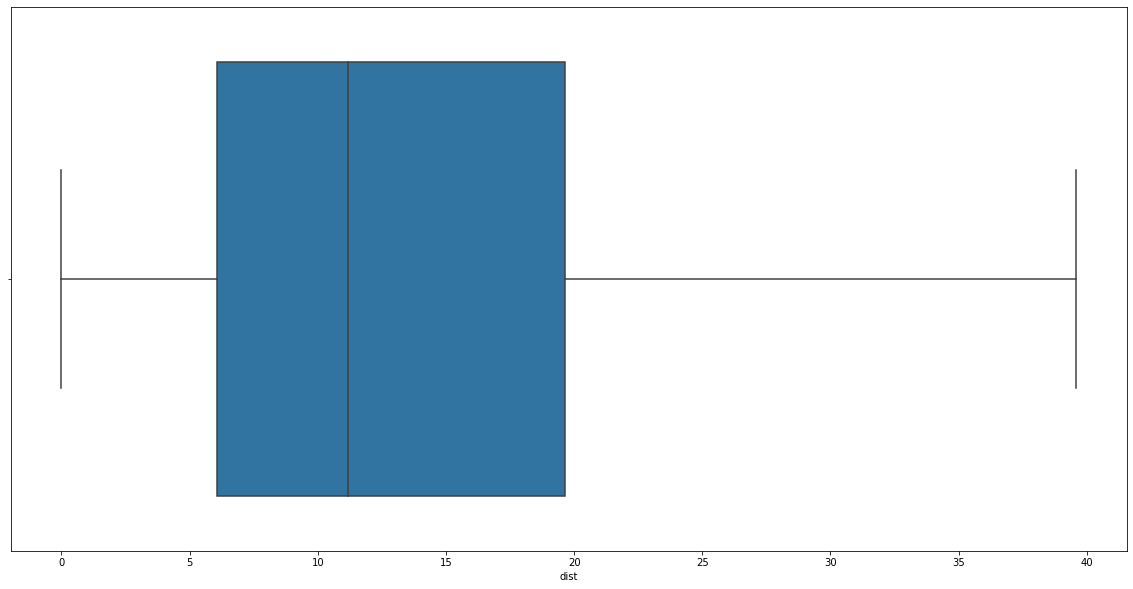

In [25]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x=df['dist'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35862 entries, 37 to 99532
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRÍCULA       35862 non-null  int64  
 1   ATRASO          35862 non-null  float64
 2   Carga           35862 non-null  float64
 3   Tempo de casa   35862 non-null  float64
 4   SALÁRIO         35862 non-null  float64
 5   SO              35862 non-null  float64
 6   SX              35862 non-null  float64
 7   MANUAL          35862 non-null  float64
 8   dist            35862 non-null  float64
 9   HORÁRIO INÍCIO  35862 non-null  float64
 10  HORÁRIO FINAL   35862 non-null  float64
 11  agr_SINDICATO   35862 non-null  object 
 12  DiaSemana       35862 non-null  int64  
 13  DiaSemana_0     35862 non-null  uint8  
 14  DiaSemana_1     35862 non-null  uint8  
 15  DiaSemana_2     35862 non-null  uint8  
 16  DiaSemana_3     35862 non-null  uint8  
 17  DiaSemana_4     35862 non-null

In [27]:
df = df.merge(pd.get_dummies(df['agr_SINDICATO'],prefix='SINDICATO'),how='inner', left_index=True, right_index=True)
df = df.drop('agr_SINDICATO',axis=1)

In [28]:
df.corr()['ATRASO'].sort_values(ascending=False)

ATRASO                      1.000000
Carga                       0.154215
HORÁRIO FINAL               0.130045
Tempo de casa               0.082665
SINDICATO_SINTACLUNS        0.077419
SINDICATO_SEEAC             0.063228
SALÁRIO                     0.059142
SINDICATO_SINDILIMP         0.057016
SINDICATO_SINDIASSEIO       0.054608
SalarioMin                  0.048605
SINDICATO_SCABEL            0.047067
Mes_7                       0.038476
MANUAL                      0.030898
Mes_2                       0.029891
DiaSemana_5                 0.025478
Mes_3                       0.018208
SINDICATO_SINTE             0.013503
SINDICATO_SINDEAC           0.010970
SINDICATO_SINDICOVI         0.009931
DiaSemana_3                 0.009573
SX                          0.007691
DiaSemana_2                 0.005946
SO                          0.005846
DiaSemana_4                 0.005461
Mes_10                      0.005429
Mes_4                       0.002731
SINDICATO_SINETUR           0.001638
S

In [29]:
df.to_csv(r'BD Tratado\VariaveisValidadas.csv',sep=';',index=False)